In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
import time

# 訓練データの作成

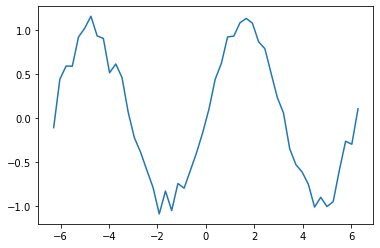

In [24]:
# -2πから2πまでを50等分したデータ
x_data = np.linspace(-2*np.pi, 2*np.pi)
# sin関数にノイズを加える
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) 

plt.plot(x_data, sin_data)
plt.show()

In [25]:
n_rnn = 10 # 時系列の数
n_sample = len(x_data)-n_rnn # サンプル数
x = np.zeros((n_sample, n_rnn)) # 入力
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn] 
    t[i] = sin_data[i+1:i+n_rnn+1] # 時系列を入力より1つ後にずらす

# KerasにおけるRNNでは入力が(サンプル数, 時系列の数, 入力層のニューロン層)になっている
x = x.reshape(n_sample, n_rnn, 1) 
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)

(40, 10, 1)
(40, 10, 1)


# モデル構築

In [26]:
n_in = 1 # 入力層のニューロン数
n_mid = 20 # 中間層のニューロン数
n_out = 1 # 出力層のニューロン数

# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_lstm.add(Dense(n_out, activation="linear"))
model_lstm.compile(loss="mean_squared_error", optimizer="sgd")
print(model_lstm.summary())

# GRU
model_gru = Sequential()
model_gru.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model_gru.add(Dense(n_out, activation="linear"))
model_gru.compile(loss="mean_squared_error", optimizer="sgd")
print(model_gru.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 20)            1760      
                                                                 
 dense_6 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10, 20)            440       
                                                                 
 dense_7 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 461
Trainab

# 学習

In [27]:
epochs = 500
batch_size = 8

# LSTM
start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("学習時間(LSTM):", time.time()-start_time)

# GRU
start_time = time.time()
history_gru = model_gru.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("学習時間(GRU):", time.time()-start_time)

学習時間(LSTM): 6.070091009140015
学習時間(GRU): 4.0188610553741455


# 学習結果

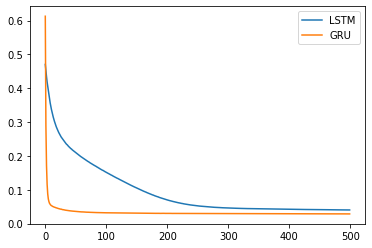

In [28]:
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_lstm)), loss_lstm, label="LSTM")
plt.plot(np.arange(len(loss_gru)), loss_gru, label="GRU")
plt.legend()
plt.show()

1/1 [==============================] - 0s 15ms/step


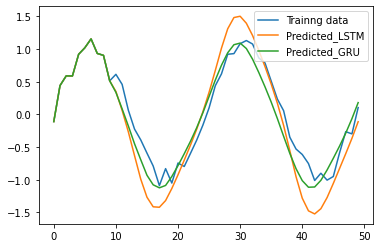

In [29]:
predicted_lstm = x[0].reshape(-1)
predicted_gru = x[0].reshape(-1)

for i in range(0, n_sample):
    y_lstm = model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1, n_rnn, 1)) 
    predicted_lstm = np.append(predicted_lstm, y_lstm[0][n_rnn-1][0])
    y_gru = model_gru.predict(predicted_gru[-n_rnn:].reshape(1, n_rnn, 1)) 
    predicted_gru = np.append(predicted_gru, y_gru[0][n_rnn-1][0])
    
# plt.plot(np.arange(len(x_data)), np.sin(x_data), label="sin")
plt.plot(np.arange(len(sin_data)), sin_data, label="Trainng data")
plt.plot(np.arange(len(predicted_lstm)), predicted_lstm, label="Predicted_LSTM")
plt.plot(np.arange(len(predicted_gru)), predicted_gru, label="Predicted_GRU")
plt.legend()
plt.show()